In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
### Loding Data

In [5]:
data_set_path = '/content/drive/MyDrive/Data sets/Cat Dog Binary Classification' # root folder 

In [6]:
# finding training data path and test data path 

In [7]:
train_data_path = '/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/training_set'
test_data_path = '/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set'

In [8]:
# setting same size of an image 

img_height, img_width = [256,256]


In [9]:
## Fixing size

In [10]:
img_width , img_height = 150,150

In [11]:
# glog is used to find the number of folder inside a folder

In [12]:
import glob

In [13]:
from glob import glob 
glob('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/training_set/*')  # * is used to find number of folders inside a folder 

['/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/training_set/cats',
 '/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/training_set/dogs']

In [14]:
from glob import glob 
glob('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/*')  # * is used to find number of folders inside a folder 

['/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/dogs',
 '/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/cats']

In [15]:
#Data Augumentation Means 1 image converts into multiple image
#Transformation means changing the images as linear format

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
preprocess_train_data = ImageDataGenerator(rescale = 1./255,
                                           shear_range = 0.2,
                                           horizontal_flip = True,
                                           zoom_range = 0.2)

In [18]:
preprocess_test_data = ImageDataGenerator(rescale = 1./255)

In [19]:
labels = ['cats','dogs']

In [20]:
train_data = preprocess_train_data.flow_from_directory(train_data_path , target_size = (img_height,img_width) , classes = labels , class_mode = 'binary' , batch_size = 32)

Found 8005 images belonging to 2 classes.


In [21]:
test_data =  preprocess_test_data.flow_from_directory(test_data_path , target_size = (img_height,img_width) , classes = labels , class_mode = 'binary' , batch_size = 32)

Found 2023 images belonging to 2 classes.


In [22]:
# Developing CNN Custom Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import sigmoid,relu,softmax


In [24]:
## Architecture

In [25]:

model = Sequential()
# first kernel and max poo layers
model.add(Conv2D(128 , kernel_size = (3,3) , input_shape = (img_height,img_width,3) , padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# second kernel and max poo layers
model.add(Conv2D(64 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# third kernel and max poo layers
model.add(Conv2D(32 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# forth kernel and max poo layers
model.add(Conv2D(6 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten()) # one dimensional array
# above 1d data give to ANN 
model.add(Dense(32,activation='relu')) # hiddel layer 1
model.add(Dense(16,activation = 'relu')) # hiddel layer 2
# output layer 
model.add(Dense(1,activation='sigmoid'))



In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [27]:
## Need to define optimizer , loss function and metric

In [28]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['Accuracy'])

In [29]:
## Model Training Begins

In [30]:
model.fit(train_data , epochs = 5)

Epoch 1/5
251/251 [==============================] - 2393s 9s/step - loss: 0.6872 - Accuracy: 0.5468
Epoch 2/5
251/251 [==============================] - 72s 285ms/step - loss: 0.6533 - Accuracy: 0.6132
Epoch 3/5
251/251 [==============================] - 72s 287ms/step - loss: 0.6109 - Accuracy: 0.6736
Epoch 4/5
251/251 [==============================] - 71s 284ms/step - loss: 0.5826 - Accuracy: 0.6949
Epoch 5/5
251/251 [==============================] - 72s 288ms/step - loss: 0.5639 - Accuracy: 0.7046


In [31]:
model.history.history.keys()

dict_keys(['loss', 'Accuracy'])

In [32]:
training_loss = model.history.history['loss']

In [33]:
training_loss

[0.687167763710022,
 0.6532721519470215,
 0.6109159588813782,
 0.5825849175453186,
 0.5639058351516724]

In [34]:
training_acc = model.history.history['Accuracy']
training_acc

[0.5467832684516907,
 0.6132417321205139,
 0.6735790371894836,
 0.6949406862258911,
 0.7045596241950989]

In [35]:
# EDA for Model validation

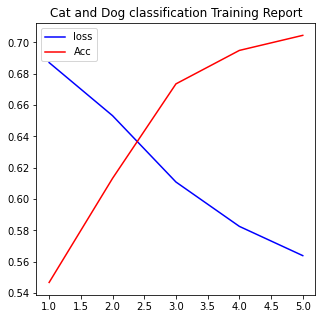

In [37]:
plt.figure(figsize = (5,5))
plt.title('Cat and Dog classification Training Report')
plt.plot(np.arange(1,6) , training_loss , color = 'b',label = 'loss')
plt.plot(np.arange(1,6) , training_acc , color = 'r',label = 'Acc')
plt.legend(loc = 0)
plt.show()

In [38]:
# Actual dependent values will be consider as 
test_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [39]:
test_data.classes[:1010]

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [40]:
test_data.classes[1010:]

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [41]:
y_test_pred = model.predict(test_data)

64/64 [==============================] - 1223s 19s/step


In [42]:
y_test_pred

array([[0.7033681 ],
       [0.9252888 ],
       [0.07191389],
       ...,
       [0.3613397 ],
       [0.4304136 ],
       [0.8843597 ]], dtype=float32)

In [43]:
# converting probability values into 0 and 1 class for checking performance report 
c = []
for i in y_test_pred:
  for j in i:
    if j > 0.5:
      c.append(1)
    else:
      c.append(0)
    

In [44]:
c[:15]

[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]

In [45]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix

In [46]:
# Accuracy

In [48]:
accuracy_score(test_data.classes , c)

0.5269401878398419

In [49]:
## Confusion matrix

In [50]:
confusion_matrix(test_data.classes , c)

array([[520, 491],
       [466, 546]])

In [51]:
## Classification Report

In [52]:
print(classification_report(test_data.classes , c))

              precision    recall  f1-score   support

           0       0.53      0.51      0.52      1011
           1       0.53      0.54      0.53      1012

    accuracy                           0.53      2023
   macro avg       0.53      0.53      0.53      2023
weighted avg       0.53      0.53      0.53      2023



In [54]:
# Now downloading the  cat and  dog images from internt and checking with developed model 

In [57]:
## First Checking For Cats

[[[ 87  55  32]
  [ 87  55  32]
  [ 87  55  32]
  ...
  [ 96  71  49]
  [ 96  71  49]
  [ 96  71  49]]

 [[ 88  56  33]
  [ 88  56  33]
  [ 88  56  33]
  ...
  [100  68  43]
  [100  68  43]
  [100  68  43]]

 [[ 90  58  35]
  [ 90  58  35]
  [ 90  58  35]
  ...
  [108  67  35]
  [108  67  35]
  [108  67  35]]

 ...

 [[105  79  78]
  [170 147 155]
  [149 130 149]
  ...
  [190 177 187]
  [189 176 186]
  [189 176 186]]

 [[130 106 122]
  [174 150 172]
  [ 69  50  80]
  ...
  [167 153 166]
  [167 153 166]
  [168 154 167]]

 [[184 161 181]
  [ 71  51  78]
  [130 113 149]
  ...
  [174 160 173]
  [173 159 172]
  [172 158 171]]]
(333, 500, 3)


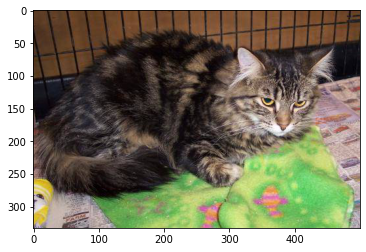

In [53]:
import matplotlib.pyplot as plt 
img = plt.imread('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/training_set/cats/cat.1005.jpg')
print(img)
print(img.shape)
plt.imshow(img)

[[[ 47  28  13]
  [ 47  28  13]
  [ 46  27  12]
  ...
  [ 92  65  46]
  [ 92  65  46]
  [ 92  65  46]]

 [[ 47  28  13]
  [ 47  28  13]
  [ 46  27  12]
  ...
  [ 93  66  47]
  [ 93  66  47]
  [ 93  66  47]]

 [[ 46  28  14]
  [ 46  28  14]
  [ 45  27  13]
  ...
  [ 92  67  47]
  [ 92  67  47]
  [ 92  67  47]]

 ...

 [[117  90  69]
  [115  90  68]
  [116  91  69]
  ...
  [ 52  48  37]
  [ 51  47  36]
  [ 50  46  35]]

 [[117  89  67]
  [114  88  65]
  [113  87  64]
  ...
  [ 52  48  37]
  [ 51  47  36]
  [ 50  46  35]]

 [[116  88  64]
  [115  87  63]
  [115  89  64]
  ...
  [ 48  44  33]
  [ 47  43  32]
  [ 46  42  31]]]
(377, 499, 3)


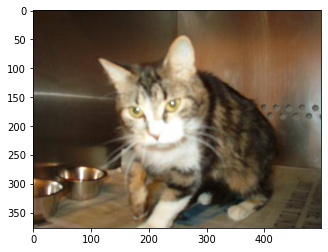

In [55]:
import matplotlib.pyplot as plt 
img = plt.imread('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/training_set/cats/cat.1015.jpg')
print(img)
print(img.shape)
plt.imshow(img)

[[[165 165 165]
  [159 159 159]
  [154 154 154]
  ...
  [160  73  92]
  [158  71  90]
  [157  70  89]]

 [[164 164 164]
  [161 161 161]
  [157 157 157]
  ...
  [159  72  91]
  [158  71  90]
  [157  70  89]]

 [[162 162 162]
  [161 161 161]
  [158 158 158]
  ...
  [158  71  90]
  [157  70  89]
  [156  69  88]]

 ...

 [[ 14  14  12]
  [ 16  16  14]
  [ 19  19  17]
  ...
  [ 78  80  75]
  [ 90  92  87]
  [ 96  98  93]]

 [[ 15  15  13]
  [ 17  17  15]
  [ 21  21  19]
  ...
  [ 78  80  75]
  [ 90  92  87]
  [ 95  97  92]]

 [[ 16  16  14]
  [ 18  18  16]
  [ 21  21  19]
  ...
  [ 77  79  74]
  [ 87  89  84]
  [ 90  92  87]]]
(374, 500, 3)


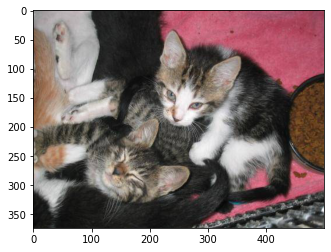

In [56]:
import matplotlib.pyplot as plt 
img = plt.imread('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/training_set/cats/cat.1025.jpg')
print(img)
print(img.shape)
plt.imshow(img)

In [58]:
## Now Checking For Dogs

[[[119 106  90]
  [119 106  90]
  [119 106  90]
  ...
  [119 106  90]
  [119 106  90]
  [119 106  90]]

 [[119 106  90]
  [119 106  90]
  [119 106  90]
  ...
  [119 106  90]
  [119 106  90]
  [119 106  90]]

 [[119 106  90]
  [119 106  90]
  [119 106  90]
  ...
  [119 106  90]
  [119 106  90]
  [119 106  90]]

 ...

 [[126 122 111]
  [134 130 119]
  [140 136 125]
  ...
  [130 126 117]
  [131 127 118]
  [132 128 119]]

 [[129 125 114]
  [135 131 120]
  [139 135 124]
  ...
  [132 128 119]
  [134 130 121]
  [137 133 124]]

 [[132 128 117]
  [137 133 122]
  [137 133 122]
  ...
  [135 131 122]
  [139 135 126]
  [142 138 129]]]
(403, 454, 3)


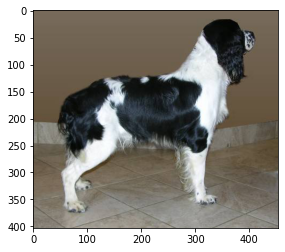

In [59]:
import matplotlib.pyplot as plt 
img = plt.imread('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/dogs/dog.4005.jpg')
print(img)
print(img.shape)
plt.imshow(img)

[[[201 239 242]
  [202 240 243]
  [177 212 216]
  ...
  [  3   4   6]
  [  3   4   6]
  [  3   4   6]]

 [[160 198 201]
  [192 230 233]
  [212 247 251]
  ...
  [  3   4   6]
  [  3   4   6]
  [  3   4   6]]

 [[115 153 154]
  [168 203 205]
  [209 244 246]
  ...
  [  3   5   4]
  [  3   5   4]
  [  3   5   4]]

 ...

 [[212 233 236]
  [212 231 235]
  [214 233 237]
  ...
  [132 133 119]
  [134 135 121]
  [144 145 131]]

 [[210 229 233]
  [210 228 232]
  [209 227 231]
  ...
  [137 135 122]
  [148 146 133]
  [167 165 152]]

 [[215 233 237]
  [214 232 236]
  [213 228 233]
  ...
  [138 136 123]
  [157 155 142]
  [182 180 167]]]
(455, 342, 3)


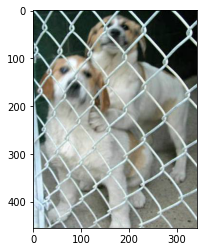

In [60]:
import matplotlib.pyplot as plt 
img = plt.imread('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/dogs/dog.4008.jpg')
print(img)
print(img.shape)
plt.imshow(img)

[[[ 62 107 100]
  [ 25  70  63]
  [ 30  73  66]
  ...
  [ 15  41  54]
  [ 30  56  69]
  [ 30  56  69]]

 [[ 22  65  58]
  [ 38  81  74]
  [ 59 101  97]
  ...
  [ 61  87 100]
  [ 81 107 120]
  [ 89 115 128]]

 [[ 54  95  91]
  [ 68 109 105]
  [ 91 131 130]
  ...
  [ 15  41  54]
  [ 30  56  69]
  [ 40  66  79]]

 ...

 [[ 27  69  65]
  [ 59 101  97]
  [ 71 112 106]
  ...
  [  1  22  25]
  [  0  15  18]
  [  7  28  31]]

 [[ 33  75  71]
  [ 63 105 101]
  [ 51  92  86]
  ...
  [  3  24  27]
  [  7  28  31]
  [ 10  31  34]]

 [[  0  42  38]
  [ 42  84  80]
  [ 33  74  68]
  ...
  [  4  28  30]
  [ 18  42  44]
  [ 11  35  37]]]
(374, 500, 3)


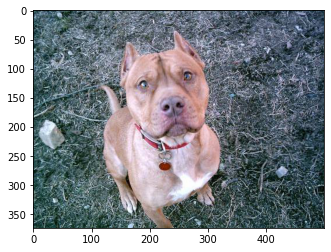

In [61]:
import matplotlib.pyplot as plt 
img = plt.imread('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/dogs/dog.4025.jpg')
print(img)
print(img.shape)
plt.imshow(img)

In [62]:
import cv2

In [63]:
# create a function to take the image from its path 

def prediction(path):
  # load the image 
  image = plt.imread(path)
#  print(image)
  print(image.shape)
  # since training has be done with 150 , 150 so we need to resize the image into 150,150
  image = cv2.resize(image , (150,150))
  print(image.shape)
  # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
  image = np.array(image) / 255.0
 # print(image)
  # Now we need to make sure convert data into Deep learning CNN trained Manner 
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  # print(image)
  # Now give the data to trained model
  result = model.predict(image)
  print(result)
  if result[0][0] > 0.5:
    print('The Prediction is = Dog')
  else:
    print('The Prediction is = Cat') 
  img = plt.imread(path)
  plt.imshow(img)



(374, 500, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 255ms/step
[[0.36640486]]
The Prediction is = Cat


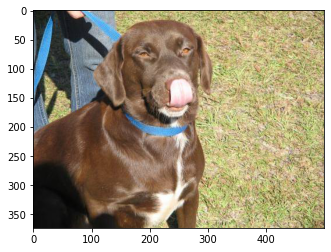

In [64]:
prediction('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/dogs/dog.4055.jpg')

(375, 499, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 19ms/step
[[0.94433725]]
The Prediction is = Dog


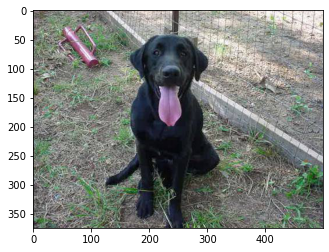

In [65]:
prediction('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/dogs/dog.4045.jpg')

(500, 351, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 18ms/step
[[0.46630657]]
The Prediction is = Cat


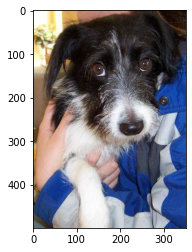

In [66]:
prediction('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/dogs/dog.4080.jpg')

(500, 308, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 29ms/step
[[0.3529076]]
The Prediction is = Cat


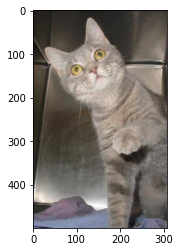

In [67]:
prediction('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/cats/cat.4088.jpg')

(375, 499, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 27ms/step
[[0.6168168]]
The Prediction is = Dog


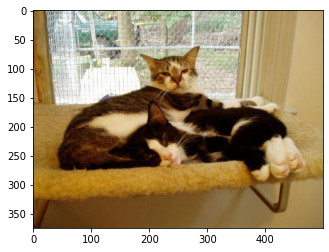

In [68]:
prediction('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/cats/cat.4075.jpg')

(303, 449, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 21ms/step
[[0.28433266]]
The Prediction is = Cat


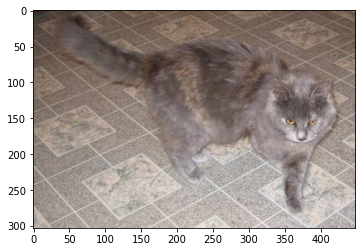

In [69]:
prediction('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/cats/cat.4125.jpg')